# Object Detection Using Custom YOLOv8 Object Detector

Import needed modules

In [7]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

### The dataset is structured in the following manner:

```
├── data.yaml
├── test
│   ├── images
│   └── labels
├── train
│   ├── images
│   └── labels
└── valid
    ├── images
    └── labels

```

### The Dataset YAML File

The dataset YAML (`data.yaml`) file containing the path to the training and validation images and labels is already provided. This file will also contain the class names from the dataset.

The dataset contains number of classes: [ ... ]

The following block shows the contents of the `data.yaml` file.

```yaml
path: ../Cars Detection
train: train/images
val: valid/images

nc: 5
names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
```

----------------------------------------------------

# Create needed functions

### Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.

In [8]:
'''The current annotations in the text files are in normalized `[x_center, y_center, width, height]` format.
    Let's write a function that will convert it back to `[x_min, y_min, x_max, y_max]` format to check these annotations'''

def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2] / 2, bboxes[1] - bboxes[3] / 2
    xmax, ymax = bboxes[0]+bboxes[2] / 2, bboxes[1] + bboxes[3] / 2
    return xmin, ymin, xmax, ymax

In [9]:
class_names = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        
        # denormalize the coordinates
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        
        # Text width and height
        tw, th = cv2.getTextSize(class_name, 0, fontScale=font_scale, thickness=font_thickness)[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

### Function to plot images with the bounding boxes.

In [10]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

### Visualize images sample.

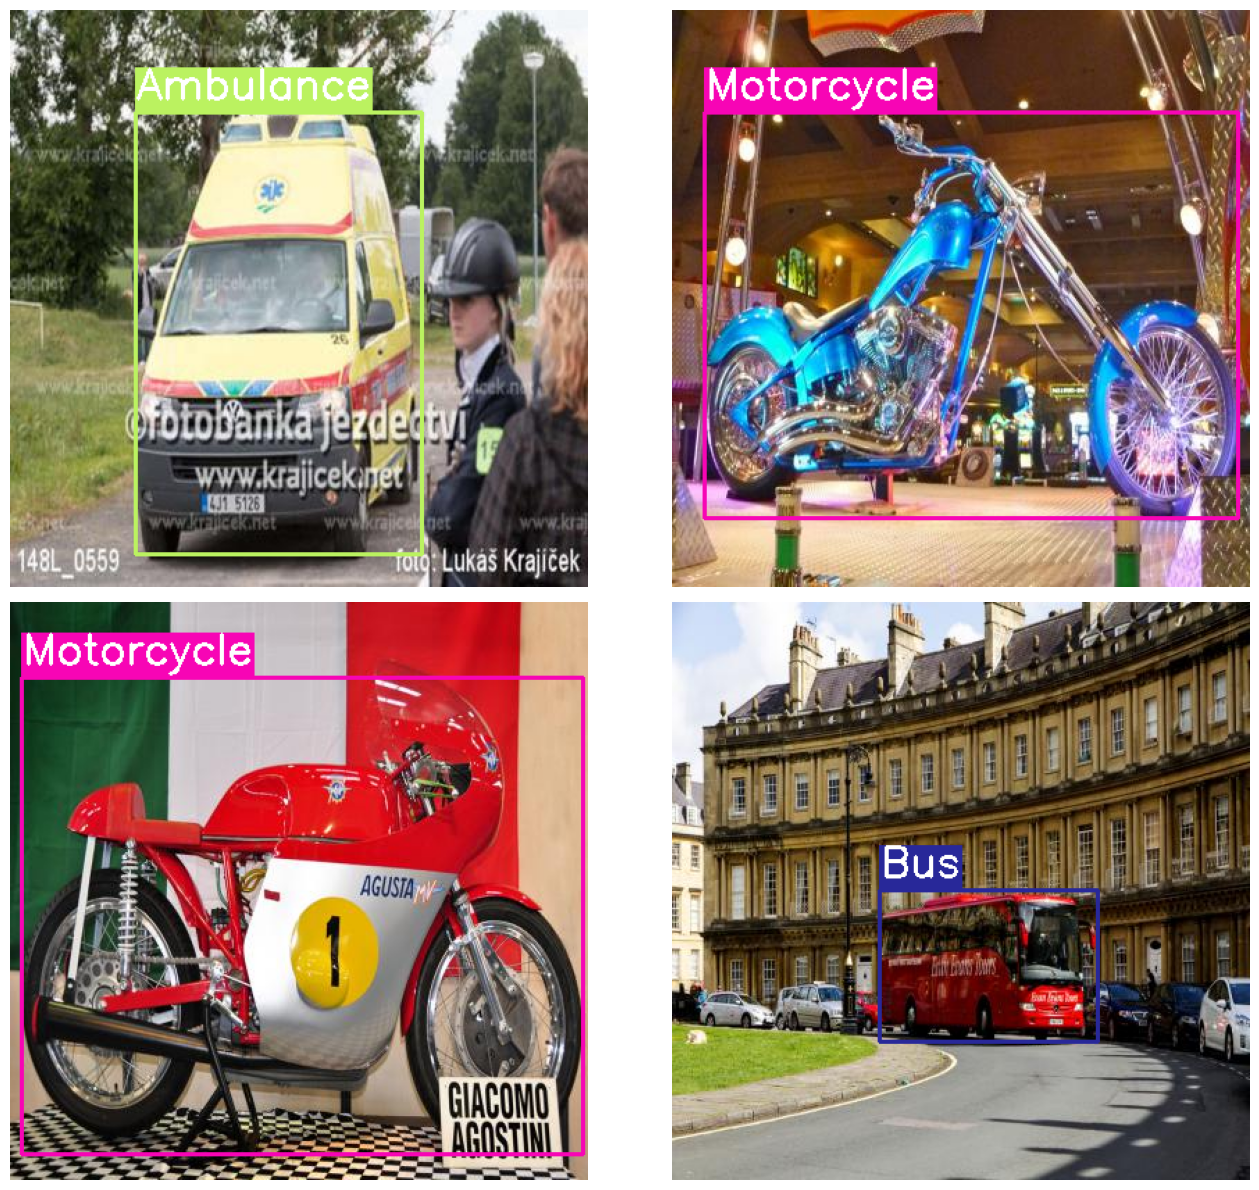

In [11]:
plot(image_paths='Cars Detection/train/images/*',
    label_paths='Cars Detection/train/labels/*',
    num_samples=4,
)

# YOLOV8

In [12]:
!pip install ultralytics
!pip install -U ultralytics

In [13]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

In [ ]:
# Use the model
results = model.train(data="D:/Projects/Graduation Project/Car Detecation/data.yaml", epochs=100)  # train the model

Ultralytics 8.3.82  Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:/Projects/Graduation Project/Car Detecation/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning D:\Projects\Graduation Project\Car Detecation\Cars Detection\train\labels.cache... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<?, ?it/s]
g:\Anaconda\envs\pytorch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


g:\Anaconda\envs\pytorch_env\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\Projects\Graduation Project\Car Detecation\Cars Detection\valid\labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.74G      3.264      4.399       4.21         45        640: 100%|██████████| 55/55 [02:42<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:24<00:00,  3.05s/it]

                   all        250        454    0.00235      0.507     0.0121      0.004



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.74G       3.23      4.264      4.002         38        640: 100%|██████████| 55/55 [02:27<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:47<00:00,  5.97s/it]

                   all        250        454    0.00262      0.354    0.00255    0.00085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.74G          3       4.17      3.669         44        640: 100%|██████████| 55/55 [01:07<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<00:00,  2.71s/it]

                   all        250        454    0.00359      0.482     0.0123    0.00356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.74G      2.861      4.134      3.417         38        640: 100%|██████████| 55/55 [01:00<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<00:00,  3.13s/it]

                   all        250        454      0.205      0.285     0.0142    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.74G      2.767      4.065       3.27         54        640: 100%|██████████| 55/55 [01:20<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:00<00:00,  7.59s/it]

                   all        250        454    0.00497      0.602     0.0146    0.00437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.74G      2.632      3.975      3.171         46        640: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<00:00,  2.98s/it]

                   all        250        454    0.00379      0.702     0.0187    0.00573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.77G      2.554      3.902      3.052         57        640: 100%|██████████| 55/55 [01:49<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        250        454    0.00368      0.696     0.0235    0.00707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.74G      2.459      3.858      2.962         56        640: 100%|██████████| 55/55 [01:46<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<00:00,  2.54s/it]

                   all        250        454    0.00265      0.477     0.0153    0.00516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.74G      2.376      3.751      2.876         45        640: 100%|██████████| 55/55 [01:50<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.48s/it]

                   all        250        454     0.0215      0.107     0.0189    0.00656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.74G      2.294      3.702      2.799         47        640: 100%|██████████| 55/55 [01:16<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<00:00,  2.87s/it]

                   all        250        454      0.447     0.0548     0.0394       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.74G      2.216       3.63      2.735         50        640: 100%|██████████| 55/55 [01:24<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]

                   all        250        454      0.442     0.0452     0.0347     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.74G       2.17      3.537      2.677         41        640: 100%|██████████| 55/55 [01:38<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.88s/it]

                   all        250        454      0.285     0.0197     0.0368     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.77G      2.073      3.468      2.607         45        640: 100%|██████████| 55/55 [00:56<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:24<00:00,  3.04s/it]

                   all        250        454      0.452     0.0831      0.055     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.74G      1.997      3.358      2.543         41        640: 100%|██████████| 55/55 [01:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<00:00,  2.97s/it]

                   all        250        454      0.275     0.0452     0.0549     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.74G      1.958      3.322      2.511         68        640: 100%|██████████| 55/55 [01:22<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<00:00,  2.81s/it]

                   all        250        454      0.133     0.0302     0.0615     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.74G      1.941      3.247      2.473         55        640: 100%|██████████| 55/55 [00:51<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<00:00,  2.76s/it]

                   all        250        454      0.167     0.0573     0.0881     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.74G      1.913      3.161      2.443         60        640: 100%|██████████| 55/55 [00:50<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<00:00,  2.71s/it]

                   all        250        454     0.0671      0.116     0.0481     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.74G      1.897      3.141      2.416         46        640: 100%|██████████| 55/55 [01:14<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:35<00:00,  4.47s/it]

                   all        250        454      0.137      0.178     0.0961     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.74G      1.859      3.113      2.384         70        640: 100%|██████████| 55/55 [01:45<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]

                   all        250        454      0.096     0.0673     0.0557     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.74G      1.825      3.089      2.355         48        640: 100%|██████████| 55/55 [01:43<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        250        454      0.153      0.242      0.108      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.74G      1.786      2.969      2.309         58        640: 100%|██████████| 55/55 [01:37<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.16s/it]

                   all        250        454      0.178      0.244      0.137     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.74G      1.804      2.924      2.306         52        640: 100%|██████████| 55/55 [03:11<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [2:31:22<00:00, 1135.33s/it]  

                   all        250        454      0.166      0.234        0.1     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.77G       1.75      2.886      2.273         43        640: 100%|██████████| 55/55 [00:47<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.17s/it]

                   all        250        454       0.23      0.271      0.175      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.74G      1.762      2.881      2.282         30        640: 100%|██████████| 55/55 [00:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.11s/it]

                   all        250        454      0.194      0.296      0.143     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.74G      1.741      2.862      2.267         52        640: 100%|██████████| 55/55 [00:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.18s/it]

                   all        250        454      0.194      0.287      0.142     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.74G      1.726      2.826      2.245         59        640: 100%|██████████| 55/55 [00:43<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.14s/it]

                   all        250        454      0.136      0.245      0.114      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.74G      1.699      2.805      2.219         54        640: 100%|██████████| 55/55 [00:43<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.12s/it]

                   all        250        454      0.323      0.299      0.207      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.74G      1.626      2.706      2.147         41        640: 100%|██████████| 55/55 [00:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.25s/it]

                   all        250        454      0.259      0.255      0.196      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.77G      1.651      2.721      2.166         49        640: 100%|██████████| 55/55 [00:41<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.16s/it]

                   all        250        454      0.225       0.26      0.172     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.77G      1.638      2.675      2.147         32        640: 100%|██████████| 55/55 [00:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.18s/it]

                   all        250        454      0.242      0.215      0.183      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.74G      1.647      2.646      2.159         46        640: 100%|██████████| 55/55 [00:42<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.13s/it]

                   all        250        454      0.264      0.356      0.259      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.74G      1.628       2.61      2.137         50        640: 100%|██████████| 55/55 [00:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.14s/it]

                   all        250        454      0.273      0.238      0.191      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.74G      1.616      2.556      2.127         51        640: 100%|██████████| 55/55 [00:43<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.13s/it]

                   all        250        454      0.315      0.328      0.248      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.77G      1.628      2.576      2.139         50        640: 100%|██████████| 55/55 [00:42<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]

                   all        250        454      0.313      0.367      0.253      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.74G      1.579      2.525      2.097         44        640: 100%|██████████| 55/55 [00:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.18s/it]

                   all        250        454      0.325      0.349      0.279      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.74G      1.564      2.497      2.063         53        640: 100%|██████████| 55/55 [00:43<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.07s/it]

                   all        250        454      0.331      0.305       0.26      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.74G       1.56      2.463       2.07         53        640: 100%|██████████| 55/55 [00:41<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.09s/it]

                   all        250        454      0.302        0.3      0.265      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.74G      1.601      2.495      2.108         57        640: 100%|██████████| 55/55 [00:41<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.07s/it]

                   all        250        454      0.341      0.359      0.309      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.77G       1.52      2.447       2.03         55        640: 100%|██████████| 55/55 [00:43<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.08s/it]

                   all        250        454      0.326      0.347      0.277      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.74G      1.523      2.378      2.049         48        640: 100%|██████████| 55/55 [00:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.06s/it]

                   all        250        454      0.284      0.266      0.202      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.74G      1.545      2.403      2.035         64        640: 100%|██████████| 55/55 [00:41<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.23s/it]

                   all        250        454      0.398      0.355      0.312      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.74G      1.498      2.347          2         52        640: 100%|██████████| 55/55 [00:46<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.14s/it]

                   all        250        454      0.315      0.349      0.238      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.74G      1.484      2.338      1.997         45        640: 100%|██████████| 55/55 [00:45<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<00:00,  2.57s/it]

                   all        250        454      0.315      0.309       0.26      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.77G      1.501      2.298      1.988         45        640: 100%|██████████| 55/55 [00:49<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:23<00:00,  2.99s/it]

                   all        250        454      0.334      0.358      0.288      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.74G      1.504      2.326      1.999         46        640: 100%|██████████| 55/55 [00:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]

                   all        250        454      0.466      0.306      0.352      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.74G      1.495      2.293      2.002         42        640: 100%|██████████| 55/55 [00:58<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.77s/it]

                   all        250        454      0.511      0.345      0.343      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.74G      1.459      2.295      1.974         51        640: 100%|██████████| 55/55 [01:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]

                   all        250        454      0.424      0.311      0.351      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.74G       1.48      2.249      1.979         36        640: 100%|██████████| 55/55 [01:48<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]

                   all        250        454      0.391       0.37      0.317      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.77G      1.461      2.259      1.974         80        640: 100%|██████████| 55/55 [00:53<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:22<00:00,  2.78s/it]

                   all        250        454      0.381      0.372       0.34      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.74G      1.449      2.249       1.96         36        640: 100%|██████████| 55/55 [01:15<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<00:00,  2.56s/it]

                   all        250        454      0.321      0.411      0.305      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.74G      1.445      2.215      1.963         41        640: 100%|██████████| 55/55 [01:20<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.84s/it]

                   all        250        454      0.444      0.364      0.354      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.74G      1.475      2.237      1.974         47        640: 100%|██████████| 55/55 [01:39<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.25s/it]

                   all        250        454      0.403      0.446      0.367      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.74G      1.414      2.192      1.931         43        640: 100%|██████████| 55/55 [01:42<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]

                   all        250        454      0.477      0.408      0.393      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.74G      1.456      2.191      1.938         46        640: 100%|██████████| 55/55 [00:54<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.91s/it]

                   all        250        454      0.367       0.39      0.304       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.74G      1.393      2.118      1.904         58        640: 100%|██████████| 55/55 [00:45<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:20<00:00,  2.59s/it]

                   all        250        454       0.47      0.376      0.398      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.77G      1.396      2.106      1.908         63        640: 100%|██████████| 55/55 [00:53<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.42s/it]

                   all        250        454      0.494      0.429      0.408      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.74G      1.407        2.1       1.91         58        640: 100%|██████████| 55/55 [01:02<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.38s/it]

                   all        250        454       0.51       0.39      0.423      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.74G      1.368      2.082      1.873         42        640: 100%|██████████| 55/55 [01:07<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.46s/it]

                   all        250        454      0.357      0.394      0.359      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.74G      1.374      2.119      1.893         58        640: 100%|██████████| 55/55 [01:06<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:34<00:00,  4.25s/it]

                   all        250        454      0.363      0.415      0.378      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.56G      1.351      2.073      1.873         60        640:  47%|████▋     | 26/55 [00:20<00:22,  1.28it/s]

In [ ]:
# !pip uninstall ultralytics
# !pip install ultralytics


In [ ]:
import ultralytics
print(ultralytics.__version__)


8.3.82


In [ ]:
import os

train_path = "D:/Projects/Graduation Project/Car Detecation/Cars Detection/train/images"
val_path = "D:/Projects/Graduation Project/Car Detecation/Cars Detection/valid/images"

print("Train path exists:", os.path.exists(train_path))
print("Validation path exists:", os.path.exists(val_path))


Train path exists: True
Validation path exists: True


In [ ]:
pip install --upgrade albumentations ultralytics


  Using cached ultralytics-8.3.82-py3-none-any.whl.metadata (35 kB)
Using cached ultralytics-8.3.82-py3-none-any.whl (922 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.0
    Uninstalling ultralytics-8.2.0:
      Successfully uninstalled ultralytics-8.2.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os

labels_path = "D:/Projects/Graduation Project/Car Detecation/Cars Detection/train/labels"
files = os.listdir(labels_path)
print("Label files found:", files[:5]) 


Label files found: ['005980b3a5f93085_jpg.rf.2QZCXGReqcBORWQJKQfO.txt', '005980b3a5f93085_jpg.rf.68f1ed44dbca53b707a1d3d82d4b7d9a.txt', '00aaf0a0a9ee7e71_jpg.rf.808b1e59067887493dffad63561c2a9d.txt', '00aaf0a0a9ee7e71_jpg.rf.KBCzX2HtZviBuQY9JDTQ.txt', '00e0422e47cdbeb7_jpg.rf.a8b6f2ef17a14eb8b9228d26366a124d.txt']


In [ ]:
# import torch
# import torchvision
# print("Torch Version:", torch.__version__)
# print("Torchvision Version:", torchvision.__version__)


In [ ]:
# pip install ultralytics==8.2.0


### Model Evaluation

In [1]:
# metrics = model.val()

In [ ]:
import shutil

# Save the best model to a specific path
shutil.copy("runs/detect/train/weights/best.pt", "/kaggle/working/yolo_trained_model.pt")


In [1]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("yolo_trained_model.pt")


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import accuracy_score

# تحميل النموذج
model = YOLO("yolo_trained_model.pt")

# قائمة الأصناف المسموح بها
allowed_classes = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

# بيانات اختبار (صور + التصنيفات الحقيقية)
test_images = 
true_labels = ["Car", "Bus", "Motorcycle"]  # التصنيفات الحقيقية لكل صورة

predicted_labels = []

for img_path in test_images:
    img = cv2.imread(img_path)
    results = model.predict(img, conf=0.2)

    highest_class_name = "No object detected"
    max_conf = -1

    for r in results:
        for box in r.boxes:
            conf = float(box.conf[0]) * 100
            class_name = model.names[int(box.cls[0])]

            if class_name in allowed_classes and conf > max_conf:
                max_conf = conf
                highest_class_name = class_name

    predicted_labels.append(highest_class_name)

# حساب الدقة
accuracy = accuracy_score(true_labels, predicted_labels) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


In [ ]:
import os

print(os.listdir("runs/detect/train/weights/"))


In [ ]:
model.save("yolo_cars_detecation.pt")


In [ ]:
# model.export(format="onnx")  # Saves as best.onnx
# model.export(format="torchscript")  # Saves as best.torchscript
# model.export(format="engine")  # TensorRT engine


### Predict Images

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source='/kaggle/input/cars-detection/Cars Detection/test/images/3429c6851095a4c3_jpg.rf.2921b5c17bda3bda8b69e0f8b5e44894.jpg'

Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/cars-detection/Cars Detection/test/images/3429c6851095a4c3_jpg.rf.2921b5c17bda3bda8b69e0f8b5e44894.jpg: 640x640 2 Cars, 6.1ms
Speed: 6.4ms preprocess, 6.1ms inference, 130.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO

# تحميل النموذج المدرب
model = YOLO("yolo_trained_model.pt")

# التحقق من تحميله بنجاح
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
# تشغيل النموذج على صورة معينة
results = model.predict("/kaggle/input/cars-detection/Cars Detection/valid/images/05168c8b40707be2_jpg.rf.C9nVdX7zdvjjs5bb6BTi.jpg", save=True, conf=0.5)

# عرض النتائج
for r in results:
    print(r.boxes)  # إظهار المربعات التي تم اكتشافها



image 1/1 /kaggle/input/cars-detection/Cars Detection/valid/images/05168c8b40707be2_jpg.rf.C9nVdX7zdvjjs5bb6BTi.jpg: 640x640 1 Motorcycle, 6.5ms
Speed: 2.8ms preprocess, 6.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.], device='cuda:0')
conf: tensor([0.5880], device='cuda:0')
data: tensor([[ 65.3653,  73.8017, 383.6246, 405.9069,   0.5880,   3.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[224.4950, 239.8543, 318.2593, 332.1052]], device='cuda:0')
xywhn: tensor([[0.5397, 0.5766, 0.7650, 0.7983]], device='cuda:0')
xyxy: tensor([[ 65.3653,  73.8017, 383.6246, 405.9069]], device='cuda:0')
xyxyn: tensor([[0.1571, 0.1774, 0.9222, 0.9757]], device='cuda:0')



image 1/1 /kaggle/input/cars-detection/Cars Detection/valid/images/0053860714da4340_jpg.rf.W5imfEtsa9yRvs4xbBiq.jpg: 640x640 3 Ambulances, 5.5ms
Speed: 2.2ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


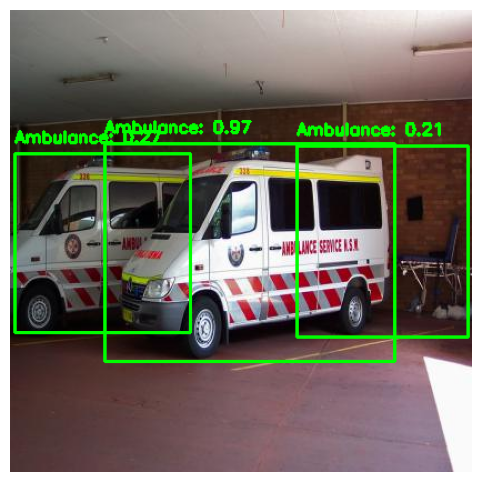

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

from ultralytics import YOLO

# تحميل النموذج المدرب
model = YOLO("yolo_trained_model.pt")

# تشغيل النموذج على الصورة
image_path = "/kaggle/input/cars-detection/Cars Detection/valid/images/0053860714da4340_jpg.rf.W5imfEtsa9yRvs4xbBiq.jpg"
img = cv2.imread(image_path)

# تشغيل النموذج على الصورة
results = model.predict(image_path, conf=0.2)

# رسم المربعات المكتشفة
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # إحداثيات الصندوق
        conf = box.conf[0]  # مستوى الثقة
        class_id = int(box.cls[0])  # رقم الفئة

        # استخراج اسم الفئة من بيانات النموذج
        class_name = model.names[class_id]

        # رسم المستطيل حول الكائن
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # إضافة اسم الفئة ومستوى الثقة
        label = f"{class_name}: {conf:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# تحويل الصورة من BGR إلى RGB لعرضها بشكل صحيح
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# عرض الصورة باستخدام matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")  # إخفاء المحاور
plt.show()


In [ ]:
from ultralytics import YOLO

# تحميل النموذج المدرب
model = YOLO("yolo_trained_model.pt")

# طباعة جميع التصنيفات
print(model.names)


{0: 'Ambulance', 1: 'Bus', 2: 'Car', 3: 'Motorcycle', 4: 'Truck'}


In [10]:
from ultralytics import YOLO

# تحميل النموذج المدرب
model = YOLO("yolo_trained_model.pt")

# تشغيل التحقق على بيانات التحقق
results = model.val(data="D:/Projects/Graduation Project/Car Detecation/Cars Detection/data.yaml")

# طباعة النتائج
print(results)


Ultralytics 8.3.82  Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
YOLOv8n summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Projects\Graduation Project\Car Detecation\Cars Detection\valid\labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]


                   all        250        454      0.464      0.503      0.485      0.345
             Ambulance         50         64      0.535      0.656      0.675      0.563
                   Bus         30         46      0.552      0.652      0.609      0.483
                   Car         90        238      0.523      0.353      0.387      0.254
            Motorcycle         42         46      0.424      0.522      0.479      0.241
                 Truck         38         60      0.284      0.333      0.274      0.184
Speed: 0.7ms preprocess, 6.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs\detect\val9
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D105599EB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_res